<a href="https://colab.research.google.com/github/GrindelfP/cup-of-coffee/blob/main/MS_task2_cupofcoffe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Equasions

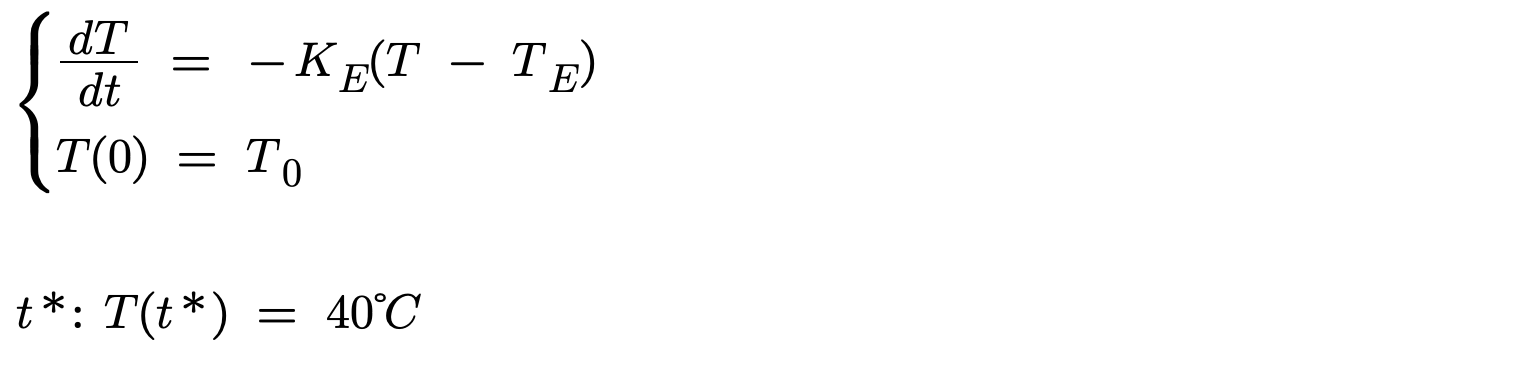

#Imports

In [1]:
from sympy import symbols, solve
import matplotlib.pyplot as plt

# Constants

In [2]:
T_initial: float = 83.0 # coffee initial temperature
T_1: float = 77.7 # coffee temperature in one minute
T_enviroment: float = 22.0 # enviroment initial temperature
dt: float = 0.0001 # time period
t_0: float = 0.0 # initial time
m_c: float = 200.0 # coffee mass
T_milk: float = 6.0 # milk temperature
m_milk: float = 50.0 # milk mass
ITERATIONS: int = 650000

# K_e coeffitient

In [3]:
def Ke2() -> float: # change on individual code
  ke = symbols('k_e')
  dt_c = 1  # 1 minute

  # Create the equation
  equation = T_1 - (T_initial + dt_c * (-ke * (T_initial - T_enviroment)))

  # Solve the equation for ke
  solution = solve(equation, ke)

  return solution

def Ke() -> float:
  return (T_1 - T_initial) / (T_initial - T_enviroment)

k_e: float = Ke()

print(k_e)

-0.08688524590163929


# Main functions

In [4]:
def t_decrement(T: float) -> float:
  return k_e * (T - T_enviroment)

def get_next_temperature(previous_T: float) -> float:
  return previous_T + dt * t_decrement(previous_T)

def drop_temp_by_milk(T_0: float) -> float:
  return (T_0 * m_c + T_milk * m_milk) / (m_c + m_milk)

# Model coffee temperature

In [5]:
def model_temperature() -> list[tuple[float, float]]:
  temp_time_pairs: list[tuple[float, float]] = [[T_initial, t_0]]
  for i in range(ITERATIONS):
    T_current = temp_time_pairs[-1][0]
    time_current = temp_time_pairs[-1][1]
    T_next = get_next_temperature(T_current)
    time_next = time_current + dt
    temp_time_next_pair = [T_next, time_next]
    temp_time_pairs.append(temp_time_next_pair)

  return temp_time_pairs

def model_temperature_with_milk(milk_time: float) -> list[tuple[float, float]]:
  temp_time_pairs: list[tuple[float, float]] = [[T_initial, t_0]]
  time_current: float = 0.0
  T_current: float = T_initial
  counter: int = 0
  while (time_current < milk_time):
    counter += 1
    T_current = temp_time_pairs[-1][0]
    time_current = temp_time_pairs[-1][1]
    T_next = get_next_temperature(T_current)
    time_next = time_current + dt
    temp_time_next_pair = [T_next, time_next]
    temp_time_pairs.append(temp_time_next_pair)

  T_current = drop_temp_by_milk(T_current)
  temp_time_pairs.append((T_current, milk_time))

  remaining_iterations: int = ITERATIONS - counter

  for i in range(remaining_iterations):
    T_current = temp_time_pairs[-1][0]
    time_current = temp_time_pairs[-1][1]
    T_next = get_next_temperature(T_current)
    time_next = time_current + dt
    temp_time_next_pair = [T_next, time_next]
    temp_time_pairs.append(temp_time_next_pair)

  return temp_time_pairs

# temperatures_straight = model_temperature()
# temperatures_with_milk_at_3_mins = model_temperature_with_milk(3.0)
#for t in temperatures_with_milk_at_3_mins:
#print(t)

def simulate() -> list[list[tuple[float, float]]]:
  simulation_result: list[list[tuple[float, float]]] = []
  simulation_result.append(model_temperature())

  for i in range(1, 13):
    milk_time = float(i)
    simulation_result.append(model_temperature_with_milk(milk_time))

  return simulation_result

results = simulate()

print(results[0][0])

[83.0, 0.0]


# Plotting

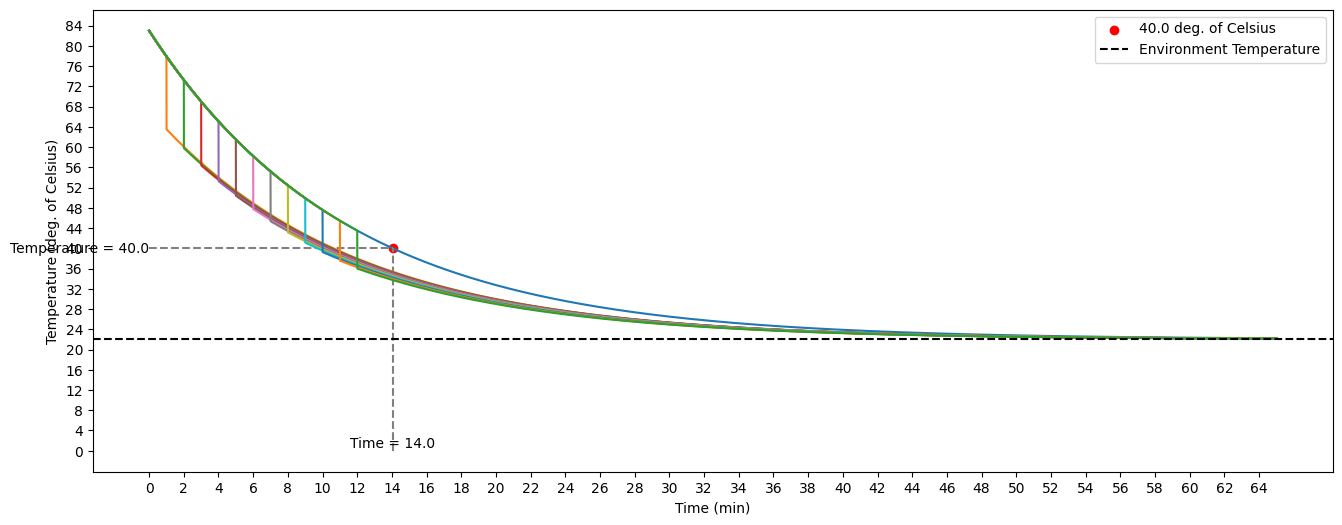

In [6]:
# Set the figure size to be 2 times wider
plt.figure(figsize=(16, 6))

y_coords: list[float] = []
x_coords: list[float] = []

# Loop over each list of tuples in the results container
for i, result in enumerate(results):
  y_coords = [coord[0] for coord in result]
  x_coords = [coord[1] for coord in result]

  plt.plot(x_coords, y_coords)

  # If this is the first line, find the first y-coordinate close to 40
  if i == 0:
    index = next((i for i, y in enumerate(y_coords) if abs(y - 40) < 0.001), None)
    if index is not None:
      plt.scatter(x_coords[index], y_coords[index], color='red', label='40.0 deg. of Celsius')
      plt.text(x_coords[index], 0, f'Time = {round(x_coords[index], 0)}', ha='center', va='bottom')
      plt.plot([x_coords[index], x_coords[index]], [0, y_coords[index]], color='gray', linestyle='--')
      plt.plot([0, x_coords[index]], [y_coords[index], y_coords[index]], color='gray', linestyle='--')
      plt.text(0, y_coords[index], f'Temperature = {round(y_coords[index], 0)}', ha='right', va='center')

plt.xlabel('Time (min)')
plt.ylabel('Temperature (deg. of Celsius)')

plt.axhline(y=22.0, color='black', linestyle='--', label='Environment Temperature')

plt.xticks(range(int(min(x_coords)), int(max(x_coords))+1, 2))
plt.yticks(range(0, 85, 4))
plt.legend()
plt.show()
